# Unit 5 - Financial Planning


In [38]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
import numpy as np
import datetime as dt
import pytz

%matplotlib inline

In [40]:
# Load .env enviroment variables
load_dotenv()

True


## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_data = requests.get(btc_url).json()
#print(json.dumps(btc_data, indent=4))
btc_price = btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
# YOUR CODE HERE!]
eth_data = requests.get(eth_url).json()
#print(json.dumps(eth_data, indent=4))
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $62020.80
The current value of your 5.3 ETH is $10239.02


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
# YOUR CODE HERE!
my_spy = 50
my_agg = 200

In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
base_url = 'https://paper-api.alpaca.markets'
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    base_url,
    api_version="v2")

In [8]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2021-02-12", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
# YOUR CODE HERE!
df_portfolio

AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2021-02-12 00:00:00-05:00  116.67  116.74  116.5418  116.58  3209765  389.85   

                                                            
                            high     low   close    volume  
time                                                        
2021-02-12 00:00:00-05:00  392.9  389.77  392.69  39697380

In [9]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
spy_close_price = float(df_portfolio["SPY"]["close"])
agg_close_price = float(df_portfolio["AGG"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.58
Current SPY closing price: $392.69


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19634.50
The current value of your 200 AGG shares is $23316.00


### Savings Health Analysis

In [11]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Create savings DataFrame
# YOUR CODE HERE!
value_data = {
    "crypto": [my_btc_value  + my_eth_value],
    "shares": [my_spy_value + my_agg_value]
}

df_savings = pd.DataFrame(value_data, index= ['amount']).T
# Display savings DataFrame
display(df_savings)

,amount
crypto,72259.817
shares,42950.500


<AxesSubplot:title={'center':'Portfolio Composition'}, ylabel='amount'>

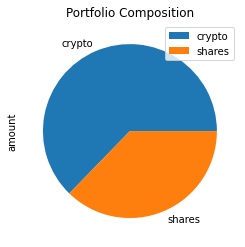

In [12]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y='amount' ,title="Portfolio Composition")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = my_btc_value + my_eth_value + my_spy_value + my_agg_value

# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print(f"Congratulations! You have exceeded your financial goal by ${total_savings - emergency_fund}!")
elif total_savings == emergency_fund:
    print(f"Congratulations! You have reached your financial goal!")
else:    
    print(f"Keep saving! You need to save an additional ${emergency_fund - total_savings} in order to reach your financial goal!")

Congratulations! You have exceeded your financial goal by $79210.317!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-02-24', tz='America/New_York').isoformat()
start_date_2 = pd.Timestamp('2016-02-12', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-02-12', tz='America/New_York').isoformat()
end_date_2 = pd.Timestamp('2017-02-24', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data_1 = alpaca.get_barset(
    tickers,
    timeframe,
    limit=1000,
    start = start_date,
    end = end_date
).df

#get_barset limit = 1000. Thus, I adjusted start_date and end_date varibles to return first 
#1000 results and then created a second data frame with new start and end date to capture remaining. 
# Dataframes were then concatenated 

df_stock_data_2 = alpaca.get_barset(
    tickers,
    timeframe,
    limit=1000,
    start = start_date_2,
    end = end_date_2
).df


df_stock_data = pd.concat([df_stock_data_2, df_stock_data_1], axis='rows',join='outer')

# Display sample data
#df_stock_data.describe()
#df_stock_data.tail()
df_stock_data.head()


AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2016-02-12 00:00:00-05:00  109.92  109.9600  109.5450  109.76  2640547.0   
2016-02-16 00:00:00-05:00  109.54  109.6100  109.4301  109.51  2145056.0   
2016-02-17 00:00:00-05:00  109.43  109.4599  109.2200  109.43  2271584.0   
2016-02-18 00:00:00-05:00  109.50  109.8100  109.4500  109.75  2595248.0   
2016-02-19 00:00:00-05:00  109.80  109.8500  109.6400  109.78  2124710.0   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2016-02-12 00:00:00-05:00  184.98  186.65  183.96  186.64  102758219  
2016-02-16 00:00:00-05:00  188.77  189.78  187.63  189.77   89705367  
2016-02-17 00:00:00-05:00  191.16  193.32  191.01  192.87  107535734  
2016-02-18 00:00:00-05:00  193.20  193.27  191.72  192.04   86202947  
2016-02-19 00:00:00-05:00  191.17  192.18  190.45  192.02   79539603

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirty = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirty.portfolio_data.head()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2016-02-12 00:00:00-05:00  109.92  109.9600  109.5450  109.76  2640547.0   
2016-02-16 00:00:00-05:00  109.54  109.6100  109.4301  109.51  2145056.0   
2016-02-17 00:00:00-05:00  109.43  109.4599  109.2200  109.43  2271584.0   
2016-02-18 00:00:00-05:00  109.50  109.8100  109.4500  109.75  2595248.0   
2016-02-19 00:00:00-05:00  109.80  109.8500  109.6400  109.78  2124710.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-02-12 00:00:00-05:00          NaN  184.98  186.65  183.96  186.64   
2016-02-16 00:00:00-05:00    -0.002278  188.77  189.78  187.63  189.77   
2016-02-17 00:00:00-05:00    -0.000731  191.16  193.32  191.01  192.87   
2016-02-18 00:00:00-05:00     0.002924  193.20  193.27  191.72  192.04   
2016-02-19 00:00:00-05:00     0.000273  191.17  192.18  190.45  192.02   

                                                   
                              volume daily_return  
time                                               
2016-02-12 00:00:00-05:00  102758219          NaN  
2016-02-16 00:00:00-05:00   89705367     0.016770  
2016-02-17 00:00:00-05:00  107535734     0.016336  
2016-02-18 00:00:00-05:00   86202947    -0.004303  
2016-02-19 00:00:00-05:00   79539603    -0.000104

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirty.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995932,0.996778,1.003461,1.004343,1.009400,1.003498,1.002544,0.986821,0.999193,0.994212,...,1.010489,0.996864,0.989513,1.001824,0.997247,1.001541,1.001464,0.998695,1.001243,0.999864
2,1.010703,0.998975,1.004843,1.006754,0.997384,1.006013,1.006437,0.991845,0.991103,0.992395,...,1.007953,0.985600,0.999436,1.012603,1.008255,0.996543,1.002823,0.998837,1.000700,0.997827
3,1.010018,0.990423,1.003298,1.007748,0.998173,1.010506,1.018184,0.991774,0.993074,1.003712,...,1.002873,0.983346,0.995173,1.005860,1.011435,0.995109,0.997702,0.997581,1.001474,0.997616
4,1.008810,0.988926,1.003518,0.999223,0.998219,1.012592,1.017587,0.991131,0.994742,1.010059,...,1.005187,0.977529,0.993906,1.004251,1.012529,0.991779,0.999261,1.002151,0.997565,0.993379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.896844,15.003481,9.404940,5.772538,3.982961,11.331939,4.870297,6.825259,7.902187,12.397895,...,6.803544,16.398494,6.488265,5.725071,16.543659,8.137455,12.113667,9.600258,6.733891,4.455736
7557,5.873133,15.112727,9.490440,5.769118,3.941411,11.327844,4.885557,6.829587,7.959645,12.358621,...,6.862504,16.457316,6.470026,5.703047,16.613564,8.154824,12.101700,9.642338,6.682037,4.461031
7558,5.872425,15.121401,9.501130,5.802181,3.952435,11.375991,4.866426,6.834899,7.903818,12.309620,...,6.922855,16.383339,6.502889,5.681894,16.518893,8.166029,12.107681,9.590158,6.668976,4.467519
7559,5.828530,15.140784,9.485111,5.792578,3.956741,11.358950,4.851148,6.800711,7.970947,12.194229,...,6.973570,16.364069,6.473540,5.644953,16.453829,8.116657,12.095651,9.545169,6.644338,4.454973


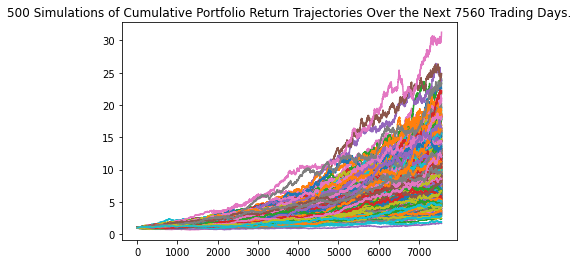

In [22]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_thirty.plot_simulation()

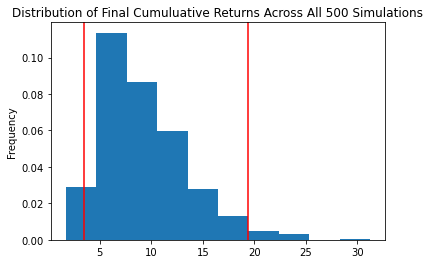

In [20]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
prob_dist = MC_thirty.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_thirty.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean              9.380545
std               4.266928
min               1.693636
25%               6.231770
50%               8.403223
75%              11.762108
max              31.252466
95% CI Lower      3.441338
95% CI Upper     19.404975
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $68826.75 and $388099.49


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $103240.13 and $582149.24


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_five = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009951,0.997014,1.005862,0.999095,1.002539,1.004498,1.001685,1.001352,1.003456,1.001409,...,1.000922,0.991695,0.997575,0.999873,0.999417,0.996826,1.013212,0.996064,0.999465,1.002184
2,1.008571,1.001842,1.011986,0.999427,0.999269,1.005268,1.002582,1.006612,1.010366,1.001594,...,1.000261,0.989508,1.003962,0.997113,1.007061,1.004781,1.006325,0.994565,1.013737,1.003440
3,1.003153,0.998276,1.008359,1.000623,0.997523,1.003377,0.994124,1.011653,1.016108,0.994462,...,0.992837,0.989305,1.005131,0.993532,1.003261,1.003424,0.999105,0.999802,1.020663,1.012200
4,1.000708,1.005684,1.003531,1.003961,1.000334,1.011321,0.984815,1.011079,1.011340,0.991342,...,0.994300,0.999219,1.004928,0.987005,1.004536,1.002350,1.013340,0.990890,1.018705,1.011690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.383365,1.267030,1.443575,1.517935,1.273499,1.327962,1.324639,1.156826,1.593106,1.707493,...,1.126027,1.392489,1.757873,1.320006,1.064744,1.633546,1.424775,1.472671,1.390400,1.317365
1257,1.381549,1.278534,1.437621,1.521016,1.274232,1.327707,1.323286,1.158205,1.601087,1.711606,...,1.113346,1.389676,1.760875,1.316686,1.072371,1.626358,1.432713,1.486384,1.382572,1.313645
1258,1.370030,1.271543,1.434460,1.517899,1.266728,1.314973,1.328288,1.160609,1.608632,1.705517,...,1.117363,1.385500,1.770268,1.317129,1.075617,1.639629,1.430320,1.494791,1.395293,1.314288
1259,1.373063,1.274824,1.425657,1.517913,1.270820,1.308386,1.331073,1.155621,1.615671,1.709507,...,1.112229,1.394990,1.773669,1.328593,1.080828,1.642379,1.444280,1.498815,1.393975,1.325251


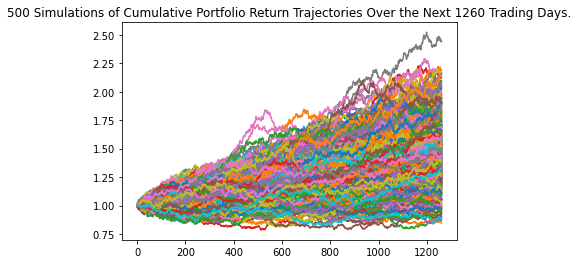

In [28]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_five = MC_five.plot_simulation()

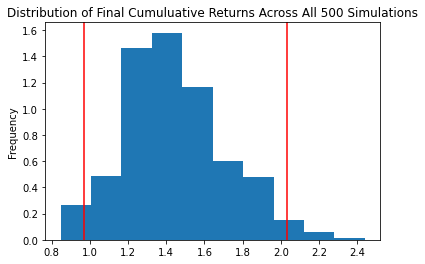

In [29]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
prob_dist_five = MC_five.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_five = MC_five.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl_five)

count           500.000000
mean              1.444644
std               0.265743
min               0.846153
25%               1.264354
50%               1.410804
75%               1.602385
max               2.440616
95% CI Lower      0.971593
95% CI Upper      2.031531
Name: 1260, dtype: float64


In [31]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_five = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(tbl_five[8]*initial_investment_five,2)
ci_upper_five = round(tbl_five[9]*initial_investment_five,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $19431.87 and $40630.63


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003152,1.003718,1.000888,0.992309,0.998210,1.000347,0.999703,0.997685,1.009043,0.998888,...,0.998607,1.003512,1.002119,1.001121,0.992646,0.997626,1.000734,1.001340,0.995912,0.997539
2,1.006030,1.008264,0.998858,0.992167,1.007066,0.996771,0.997325,0.998319,1.005429,1.007160,...,1.001860,0.995548,1.004016,1.007001,0.996513,0.995150,1.007136,0.996577,0.997289,0.998509
3,0.997665,1.021608,1.004487,0.993894,1.019388,1.002763,1.001704,0.997350,1.003924,1.008888,...,0.992314,0.996753,0.999651,1.010384,0.994557,0.998338,1.007478,0.992997,1.001373,0.999775
4,0.995303,1.020779,0.998924,1.004223,1.012971,1.007949,0.997717,0.991666,1.018174,1.013422,...,1.000568,0.996013,0.991963,1.012021,1.002586,1.001711,1.010400,0.996775,0.999157,1.007393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.968385,1.536451,2.347148,1.347322,1.566982,3.137766,1.309389,1.984828,2.558562,1.593622,...,2.255839,2.034120,1.788987,1.848304,1.896404,2.641483,1.389120,1.973083,1.620230,1.974011
2517,1.948605,1.538393,2.363123,1.339353,1.563517,3.140980,1.315928,1.991137,2.544658,1.604455,...,2.246377,2.049897,1.784568,1.869853,1.903051,2.637055,1.380387,1.969027,1.614294,1.973410
2518,1.949964,1.528887,2.354414,1.342044,1.550975,3.169868,1.317743,1.989808,2.561575,1.606092,...,2.237074,2.050773,1.782247,1.867686,1.900635,2.637385,1.389816,1.977229,1.626494,1.971341
2519,1.945793,1.543913,2.365858,1.346570,1.552623,3.194191,1.321910,1.989500,2.556618,1.602209,...,2.240557,2.063826,1.776966,1.870103,1.886868,2.671329,1.382598,1.970166,1.627284,1.952042


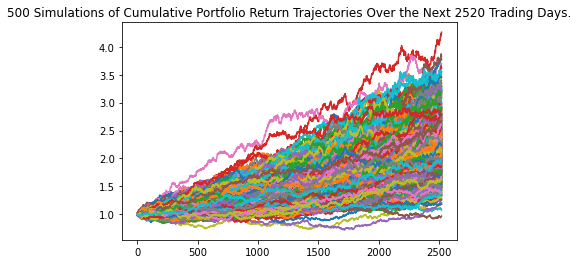

In [34]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_ten = MC_ten.plot_simulation()

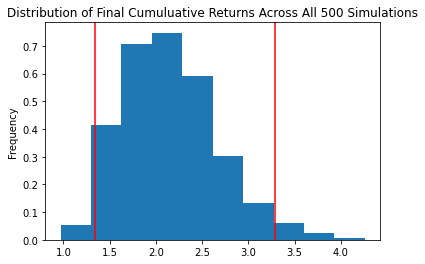

In [35]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
prob_dist_ten = MC_ten.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_ten = MC_ten.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl_ten)

count           500.000000
mean              2.152653
std               0.515345
min               0.968599
25%               1.774116
50%               2.092997
75%               2.443313
max               4.259556
95% CI Lower      1.339658
95% CI Upper      3.292657
Name: 2520, dtype: float64


In [37]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_ten = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(tbl_ten[8]*initial_investment_ten,2)
ci_upper_ten = round(tbl_ten[9]*initial_investment_ten,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $26793.15 and $65853.15
